In [1]:
import pandas as pd
import numpy as np
import random as rnd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read data
train_raw = pd.read_csv("input/train.csv")
test_raw = pd.read_csv("input/test.csv")

### Data overview

In [3]:
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train_raw.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
train_raw.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Salonen, Mr. Johan Werner",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test_raw.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Cor, Mr. Ivan",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [8]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Ticket** has large number of duplicates in both train and test set. I will explore this a further below.

### Missing values

In [9]:
# missing values
train_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# missing values
test_raw.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We observe that:
-  in the **training set**, some values of *Age*, *Cabin*, and *Embarked* are missing
-  in the **test set**, some values of *Age*, *Fare*, and *Cabin* are missing
-  for **Cabin**, more than half of values is missinf in each set and therefore I will remove this feature
-  the rest of the missing values will be populated with estimates derived from the valid data

### Working copies of the datasets
Before removing and modifying features, I will make copies of the origianl datasets

In [11]:
# deep copy to copy data and indeces
train = train_raw.copy(deep=True)
test = test_raw.copy(deep=True)

# dropping Passenger's IDs and Cabin
train = train.drop(['PassengerId', 'Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

Let's populate the missing **Age** values with mean of all the known values (in train and test set together). There might be a better way to deal with this, but a mean (or median) should be a reasonable choice.

In [12]:
mean_age = np.nanmean(pd.concat([train['Age'],test['Age']]).values)
print("Mean age = ", mean_age)
train['Age'] = train['Age'].fillna(mean_age)
test['Age'] = test['Age'].fillna(mean_age)

Mean age =  29.8811376673


Two values are missing in the **Embarked** column of the train set. 

In [13]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


Let's have a look on the distribution of possible values of Embarked in the combined dataset.

In [14]:
(pd.concat([train,test])).groupby('Embarked').count()['Sex']

Embarked
C    270
Q    123
S    914
Name: Sex, dtype: int64

Embarking in Southampton is by far the most common one and I will populate the missing values in the train set by 'S'.

In [15]:
train['Embarked'] = train['Embarked'].fillna('S')

One value is missing in the **Fare** column of the test set.

In [16]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


Let's have a look if Fare is correlated with any other feature.

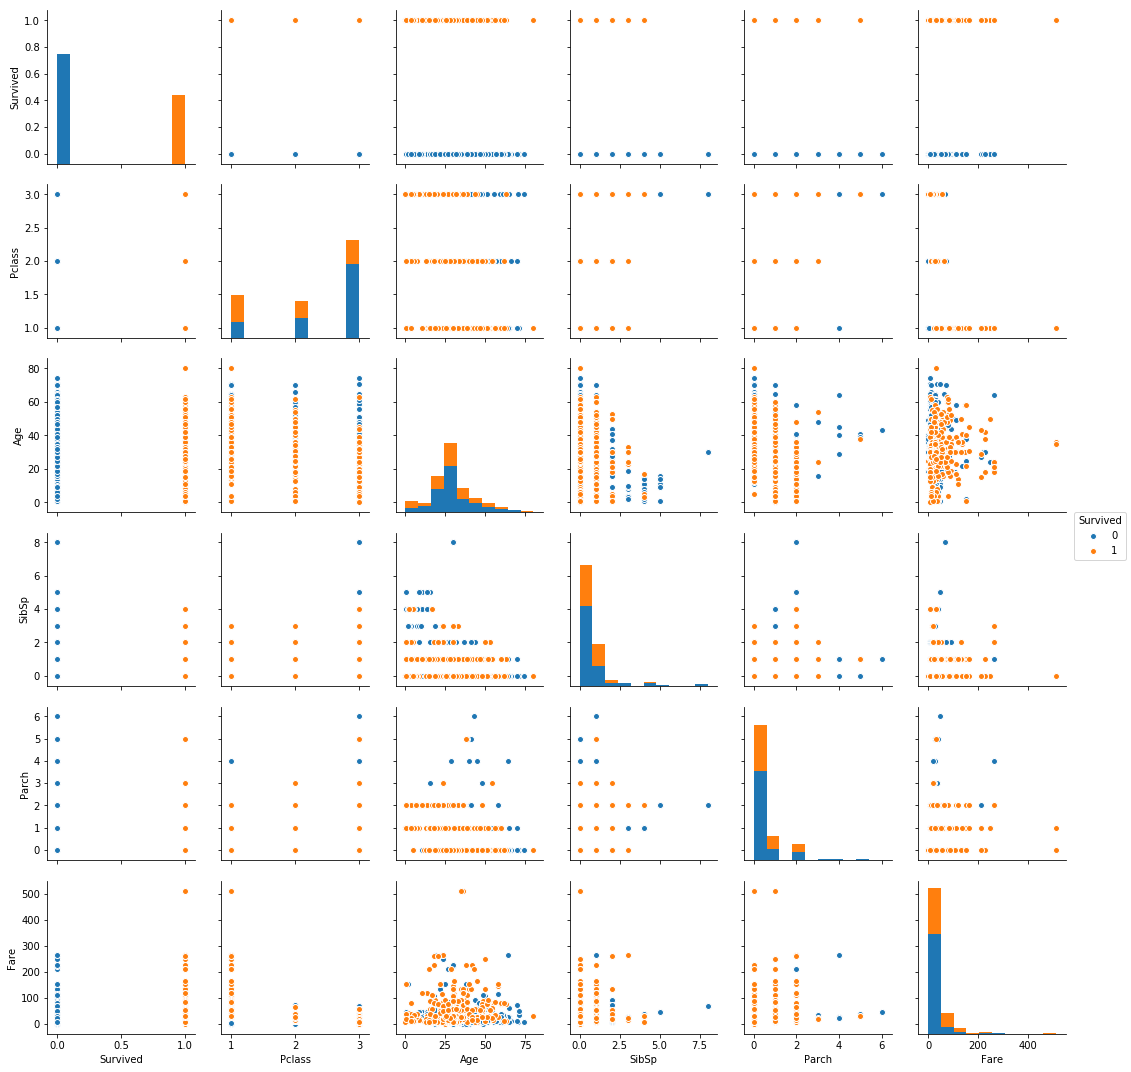

In [17]:
sns.pairplot(train, hue="Survived")

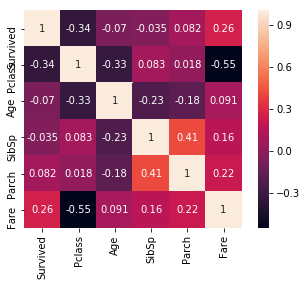

In [18]:
corr = train.corr()
sns.heatmap(corr, square=True, annot=True)

PClass is strongly correlated with Fare -- the lower the class, the lower is the Fare. Let's populate the single NaN Fare value in the test set by the mean Fare for given Pclass, that is Pclass of 3.

In [19]:
mean_fare_3 = np.nanmean(pd.concat([train[train['Pclass']==3]['Fare'],test[test['Pclass']==3]['Fare']]).values)
print("Mean Fare of passengers with Pclass==3:", mean_fare_3)
test['Fare'] = test['Fare'].fillna(mean_fare_3)

Mean Fare of passengers with Pclass==3: 13.3028887006


Now there are no more missing values and we can progress with feature engineering.

In [20]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [21]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Feature engineering
**Ticket** -- Abowe analysis showed that more than half of the values in Ticket are duplicated. Let's have a closer look on the examples

In [22]:
pd.concat(g for _, g in train.groupby("Ticket") if len(g) > 1)[:20]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
257,1,1,"Cherry, Miss. Gladys",female,30.000000,0,0,110152,86.5000,S
504,1,1,"Maioni, Miss. Roberta",female,16.000000,0,0,110152,86.5000,S
759,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.000000,0,0,110152,86.5000,S
262,0,1,"Taussig, Mr. Emil",male,52.000000,1,1,110413,79.6500,S
558,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.000000,1,1,110413,79.6500,S
585,1,1,"Taussig, Miss. Ruth",female,18.000000,0,2,110413,79.6500,S
110,0,1,"Porter, Mr. Walter Chamberlain",male,47.000000,0,0,110465,52.0000,S
475,0,1,"Clifford, Mr. George Quincy",male,29.881138,0,0,110465,52.0000,S
329,1,1,"Hippach, Miss. Jean Gertrude",female,16.000000,0,1,111361,57.9792,C
523,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.000000,0,1,111361,57.9792,C


It seems that the same Ticket is associated with people traveling together -- they often have same names (married couple, family) and same cabin. Is this correlated with survival?

In [23]:
train['Alone'] = 1
train.loc[train.duplicated(subset='Ticket'),'Alone'] = 0

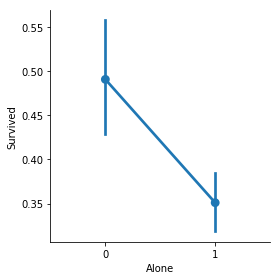

In [24]:
sns.factorplot(x="Alone", y="Survived", data=train)

It looks like the new feature **Alone** is correlated with the survival. So I will keep it and I will drop the feature Ticket now.

In [25]:
test['Alone'] = 1
test.loc[test.duplicated(subset='Ticket'),'Alone'] = 0

In [26]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

**Name** -- The feature does not bring much insight as it is. A popular (and logical) method among Kaggle kernels is to extract the title of each person from their names. The title corresponds to social and economic status and might be correlated with survival.

In [27]:
# the following is adopted from 
# https://www.kaggle.com/niklasdonges/end-to-end-project-with-python

data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [28]:
pd.concat([train,test]).groupby('Title').count()['Sex']

Title
Master     61
Miss      264
Mr        757
Mrs       198
Rare       29
Name: Sex, dtype: int64

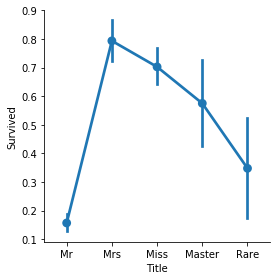

In [29]:
sns.factorplot(x="Title", y="Survived", data=train)

In [30]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

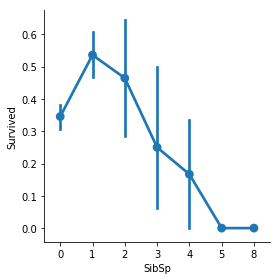

In [31]:
sns.factorplot(x="SibSp", y="Survived", data=train)

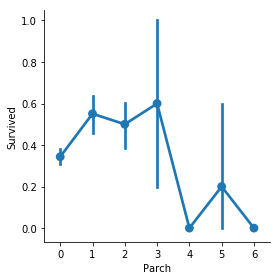

In [32]:
sns.factorplot(x="Parch", y="Survived", data=train)

In quite a few Kaggle kernels, I saw people using a variable mapping the family size of each passenger: Family size = number of children / parents + number of siblings = Parch + SibSp. 

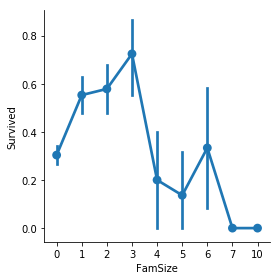

In [33]:
train['FamSize'] = train["Parch"].values+train["SibSp"]
sns.factorplot(x='FamSize', y="Survived", data=train)

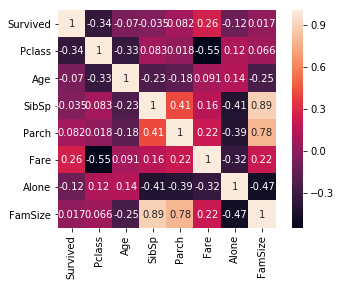

In [34]:
corr = train.corr()
sns.heatmap(corr, square=True, annot=True)

From the above plot it is not obvious to me that FamSize should be more corraleted than Parch and SibSp separately. Probably best test it in production though.

In [35]:
test['FamSize'] = test["Parch"].values+test["SibSp"]

### Categorical variables
Categorical variables (Sex, Title, Alone, and Embarked) are better transformed to dummy variable (see e.g. [here](http://pbpython.com/categorical-encoding.html)) . I will also add Pclass, because its integer represantation doesn't map the variable well -- e.g. Pclass of 2 is not twice better than of 1. Dummy variable representation might work better than the integer numerical value for Pclass.

In [37]:
pd.concat([train,test]).groupby('Sex').count()['Age']

Sex
female    466
male      843
Name: Age, dtype: int64

In [38]:
pd.concat([train,test]).groupby('Title').count()['Age']

Title
Master     61
Miss      264
Mr        757
Mrs       198
Rare       29
Name: Age, dtype: int64

In [39]:
pd.concat([train,test]).groupby('Alone').count()['Age']

Alone
0     265
1    1044
Name: Age, dtype: int64

In [40]:
pd.concat([train,test]).groupby('Embarked').count()['Age']

Embarked
C    270
Q    123
S    916
Name: Age, dtype: int64

In [42]:
pd.concat([train,test]).groupby('Pclass').count()['Age']

Pclass
1    323
2    277
3    709
Name: Age, dtype: int64

In [41]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone,Title,FamSize
0,0,3,male,22.0,1,0,7.2500,S,1,Mr,1
1,1,1,female,38.0,1,0,71.2833,C,1,Mrs,1
2,1,3,female,26.0,0,0,7.9250,S,1,Miss,0
3,1,1,female,35.0,1,0,53.1000,S,1,Mrs,1
4,0,3,male,35.0,0,0,8.0500,S,1,Mr,0


In [53]:
data = [train, test]
dummies = ['Pclass', 'Sex', 'Embarked', 'Alone', 'Title']

train = pd.get_dummies(train, columns=dummies)
test = pd.get_dummies(test, columns=dummies)

In [54]:
train.head()

,Survived,Age,SibSp,Parch,Fare,FamSize,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Embarked_C,Embarked_Q,Embarked_S,Alone_0,Alone_1,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,22.0,1,0,7.2500,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,1,38.0,1,0,71.2833,1,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,0,1,1,...,0,0,1,0,1,0,1,0,0,0
3,1,35.0,1,0,53.1000,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
